# Condiciones iniciales de una cuerda con extremos fijos

![Departamento de Física, Facultad de Ciencias Exactas y Naturales, Universidad de Buenos Aires](figuras/logoDF.png "DF, FCEyN, UBA")  
©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

----

## Enunciado
Se suelta una cuerda fija en sus extremos desde el estado inicial en reposo indicado en la figura.  
![](figuras/pat4368.png)
1. Calcule la evolución en el tiempo.
1. ¿Cuál es el modo excitado de mayor amplitud?
1. ¿Qué modos no son excitados?

## Resolución
La solución de la ecuación de onda para una cuerda con extremos fijos partiendo del reposo es 
$$ \psi(x,t)= \sum_m B_m \sin(\pi \frac{m}{L} x ) \cos(\omega_m t+ \phi_m)$$
Para obtener los $B_m$ debemos "proyectar" en la corresponiente base de Fourier 
$$
\sin{(m \frac{\pi}{L} x)} \quad \forall m,
$$
el estado inicial $f(x)$ 
$$
B_m=  \frac{2}{\lambda_1}\int_{-\frac{\lambda_1}{2}}^{\frac{\lambda_1}{2}} f(x) \sin{(m \frac{\pi}{L} x)}\,\mathrm{d}x =\frac{1}{L}\int_{-L}^L f(x) \sin{(m \frac{\pi}{L} x)}\,\mathrm{d}x
$$

In [16]:
import sympy as sp # carga biblioteca cálculo simbólico

In [17]:
# declara símbolos a usar como tales
x, m, L, a, H = sp.symbols('x, m, L, a, H')
# x va de 0 a L
# m es un número natural
# H es la máxima amplitud del estado inicial
a = H/(L/2)  # es la pendiente en (0,L/2)

Extiendo el estado inicial $f(x)$ a lo largo de la longitud de onda del modo fundamental $\lambda_1 = 2 L$ ($k_1=\frac{\pi}{L}= \frac{2 \pi}{\lambda_1}$), e.g. en $(-L,L)$.
$$ f_1 = -a (x+ L) \hspace{2cm} (-L< x <-\frac{L}{2}) $$
$$ f_2 = a x \hspace{2cm}  (-\frac{L}{2} < x < \frac{L}{2}) $$
$$ f_3 = -a (x- L) \hspace{2cm} (\frac{L}{2} < x < L)$$

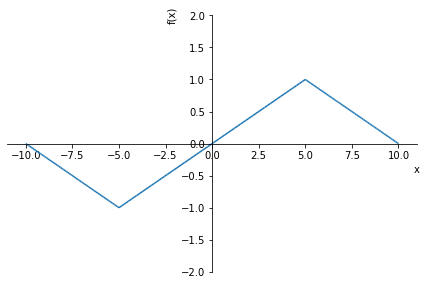

In [18]:
f1= -a* (x+ L)
f2= a*x
f3= -a* (x- L)

# Grafico la condicíon inicial con los valores H=1 L=10
f1s= f1.subs([(H, 1), (L, 10)] ), (x, -10, -5) 
f2s= f2.subs([(H, 1), (L, 10)] ), (x, -5, 5)
f3s= f3.subs([(H, 1), (L, 10)] ), (x, 5, 10)
# xlabel('x')
# ylabel('\psi')
inicial= sp.plot(f1s, f2s, f3s, ylim=[-2,2])

\begin{align}
  B_m &= \frac{1}{L} \int_{-L}^{-\frac{L}{2}} f_1(x) \sin{(m \frac{\pi}{L} x)}\,\mathrm{d}x 
  + \frac{1}{L} \int_{-\frac{-L}{2}}^{\frac{-L}{2}} f_2(x) \sin{(m \frac{\pi}{L} x)}\,\mathrm{d}x 
  + \frac{1}{L} \int_{\frac{L}{2}}^{L} f_3(x) \sin{(m \frac{\pi}{L} x)}\,\mathrm{d}x 
\end{align}

In [4]:
# El primer término
aux= sp.sin(m* sp.pi* x/ L) # los elementos de la base
e1= sp.integrate(f1* aux,(x, -L, -L/2))
sp.simplify(e1)

Piecewise((H*L*(pi*m*cos(pi*m/2) + 2*sin(pi*m/2) - 2*sin(pi*m))/(pi**2*m**2), (m > -oo) & (m < oo) & Ne(m, 0)), (0, True))

In [5]:
# El segundo
e2= sp.integrate(f2* aux,(x, -L/2, L/2))
sp.simplify(e2)

Piecewise((2*H*L*(-pi*m*cos(pi*m/2) + 2*sin(pi*m/2))/(pi**2*m**2), (m > -oo) & (m < oo) & Ne(m, 0)), (0, True))

In [6]:
#El tercero
e3= sp.integrate(f3* aux,(x, L/2, L))
sp.simplify(e3)

Piecewise((H*L*(pi*m*cos(pi*m/2) + 2*sin(pi*m/2) - 2*sin(pi*m))/(pi**2*m**2), (m > -oo) & (m < oo) & Ne(m, 0)), (0, True))

In [7]:
# Los Bm son entonces
Bm= sp.simplify((1/L)* (e1+ e2+ e3))
Bm

Piecewise((4*H*(2*sin(pi*m/2) - sin(pi*m))/(pi**2*m**2), (m > -oo) & (m < oo) & Ne(m, 0)), (0, True))

Esto equivale a $\frac{8 H}{\pi^2  m^2}$ para los $m$ impares, siendo $0$ para pares. Queda así respondido el punto c) del problema: Con la condición inicial dada no se exitan los modos pares.

La evolución temporal (punto a) del problema), si parte del reposo, es
\begin{align}
    \psi(x,t)
    &=  \sum_m \frac{8 H}{\pi^2  m^2}  \sin(\pi \frac{m}{L} x ) \cos(\omega_m t)\\
\end{align}

Respecto al punto b) del problema, es evidente de la expresión para $B_m$ que el modo de mayor amplitud es el del fundamental ($m=1$). 

In [8]:
Bm.subs([(m, 1)] )

8*H/pi**2

El módulo del coeficiente $B_m$ para el siguiente modo excitable ($m=3$) es el siguiente es casi de un orden de magnitud menor al del modo fundamental.

In [9]:
Bm.subs([(m, 3)] )

-8*H/(9*pi**2)

Grafico a continuación la suma de los primeros tres términos no nulos de la serie para evidenciar que se aproxima tal suma a la condición inicial.

In [10]:
def graficaSerie(terminos):
    qbas= (Bm*aux).subs([(H, 1), (L, 10)]) # asigno valores a A, L en terminos de la serie
    qout=0
    for k in range(0,terminos): # sumo terminos impares de la serie
        qout+= qbas.subs([(m,k*2+1)])
    p= sp.plot((qout, (x, -15, 15) ), f1s, f2s, f3s, show=False, ylim=[-2,2])
    p[0].line_color= 'red' # la suma de la serie en rojo
    p.show()

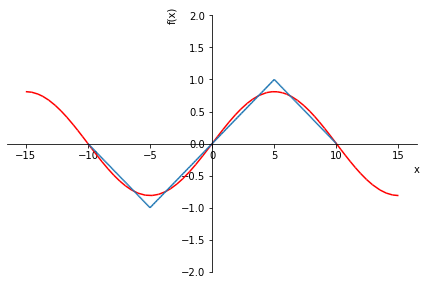

In [11]:
graficaSerie(1)

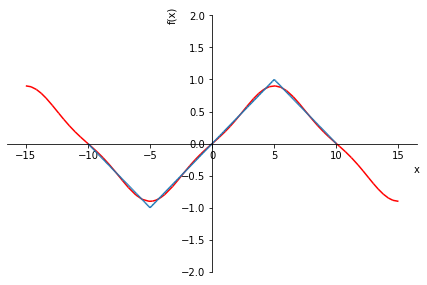

In [12]:
graficaSerie(2)

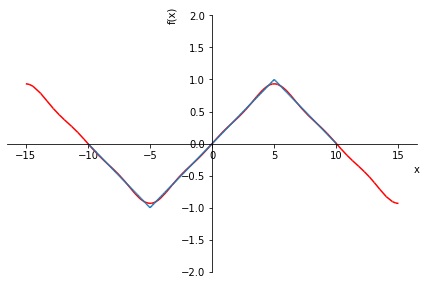

In [13]:
graficaSerie(3)

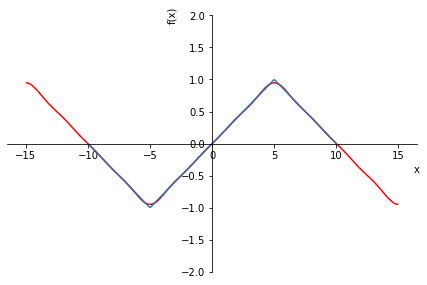

In [14]:
graficaSerie(4)

Y finalmente la suma de los 10 primeros términos es casi indistinguible de la condición inicial.

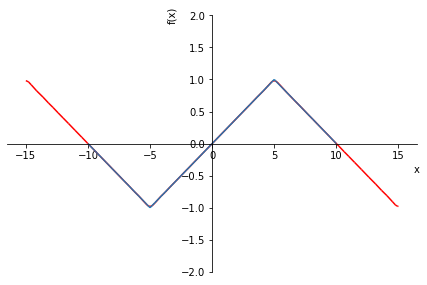

In [15]:
graficaSerie(10)